In [1]:
%pylab qt5
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/home/ca/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['radians', 'isnan', 'sqrt', 'log', 'exp', 'isinf', 'log1p', 'frexp', 'pi', 'sin', 'isfinite', 'cos', 'trunc', 'tan', 'fmod', 'copysign', 'modf', 'hypot', 'fabs', 'tanh', 'nan', 'sinh', 'floor', 'gamma', 'expm1', 'log2', 'e', 'cosh', 'degrees', 'isclose', 'inf', 'ceil', 'ldexp', 'log10']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### Kupfer

In [2]:
Cu1 = [767 - 35, 1612 - 84, 2366 - 168, 3154 - 168, 3938 - 172, 4718 - 172]
Cu2 = [2380 - 1900, 2380 - 1130, 2380 - 300, 3220 - 370]
Cu3 = [3590 - 2360, 3590 - 1570, 3590 - 770, 3590 - 20]

In [3]:
diff(Cu1)
diff(Cu2)
diff(Cu3)
dCu = concatenate([diff(Cu1), diff(Cu2), diff(Cu3)])

array([796, 670, 788, 780, 780])

array([770, 830, 770])

array([790, 800, 750])

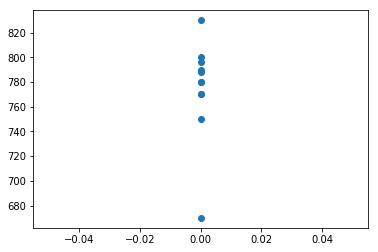

In [4]:
plt.plot(zeros_like(dCu), dCu, 'o')

In [5]:
TCu = mean(dCu); err_TCu = std(dCu, ddof=1)
print(f'{TCu:f} +- {err_TCu:f}')

774.909091 +- 40.292566


In [6]:
lCu = 1.498 # m
cCu = 2 * lCu / TCu * 1e6 # millisekunden in sekunden
err_cCu = 2 * lCu / TCu**2 * err_TCu * 1e6
print(f'{cCu:f} +- {err_cCu:f}')

3866.259972 +- 201.032016


CRC Handbook S. 14-41

### Plastik

In [7]:
P1 = [7400, 6160, 4760, 3440]
P2 = [7440, 6160, 4760, 3440]
P3 = [7400, 6120, 4840, 3560]

In [8]:
diff(P1)
diff(P2)
diff(P3)
dP = abs(concatenate([diff(P1), diff(P2), diff(P3)]))

array([-1240, -1400, -1320])

array([-1280, -1400, -1320])

array([-1280, -1280, -1280])

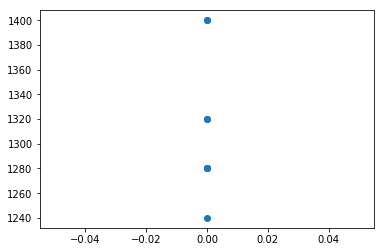

In [9]:
plt.plot(zeros_like(dP), dP, 'o')

In [10]:
TP = mean(dP); err_TP = std(dP, ddof=1)
print(f'{TP:f} +- {err_TP:f}')

1311.111111 +- 55.777335


In [11]:
lP = 1.024 # m
cP = 2 * lP / TP * 1e6 # millisekunden in sekunden
err_cP = 2 * lP / TP**2 * err_TP * 1e6
print(f'{cP:f} +- {err_cP:f}')

1562.033898 +- 66.452101


### Aluminimium

In [12]:
Al1 = [2280, 1710, 1070, 460]
Al2 = [2260, 1690, 1070, 440]
Al3 = [2270, 1700, 1050, 460]

In [13]:
diff(Al1)
diff(Al2)
diff(Al3)
dAl = abs(concatenate([diff(Al1), diff(Al2), diff(Al3)]))

array([-570, -640, -610])

array([-570, -620, -630])

array([-570, -650, -590])

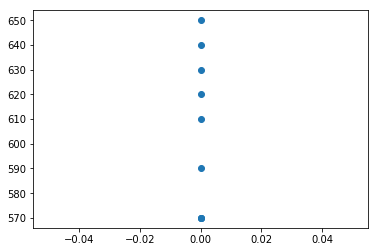

In [14]:
plt.plot(zeros_like(dAl), dAl, 'o')

In [15]:
TAl = mean(dAl); err_TAl = std(dAl, ddof=1)
print(f'{TAl:f} +- {err_TAl:f}')

605.555556 +- 31.666667


In [16]:
lAl = 1.499 # m
cAl = 2 * lAl / TAl * 1e6 # millisekunden in sekunden
err_cAl = 2 * lAl / TAl**2 * err_TAl * 1e6
print(f'{cAl:f} +- {err_cAl:f}')

4950.825688 +- 258.896389


## Elasizitätsmodule

$E = \rho {c_\mathrm{S}}^2$

In [41]:
rhoCu, rhoAl, rhoP = 8.95e3, 2.7e3, 1.4e3
err_rhoCu, err_rhoAl, err_rhoP = .05e3, .1e3, .2e3
E_Cu = rhoCu * cCu**2
err_E_Cu = sqrt((cCu * 2*rhoCu * err_rhoCu)**2 +
                (rhoCu**2 * err_cCu)**2)
print(f'{E_Cu:f} +- {err_E_Cu:f}') # kg^2 m^-5 s^-1


133784297220.468521 +- 16470752378.437643


In [50]:
for m in ['Cu', 'Al', 'P']:
    rho, c, err_rho, err_c = \
        eval(f'rho{m}, c{m}, err_rho{m}, err_c{m}')
    E = rho * c**2 * 1e-9 # GPa
    # err_E = sqrt((c**2 * err_rho)**2 +
    #              ((rho * 2*c * err_c))**2) * 1e-9
    err_E = rho * 2*c * err_c * 1e-9
    # (c**2 * err_rho) * 1e-6
    # (rho * 2*c * err_c) * 1e-6
    print(f'{m}: {E:f} +- {err_E:f} MPa') # kg^2 m^-5 s^-1
    exec(f'E{m} = {E}; err_E{m} = {err_E}')

Cu: 133.784297 +- 13.912632 MPa
Al: 66.178822 +- 6.921455 MPa
P: 3.415930 +- 0.290641 MPa


# Aufgabe 3

In [51]:
f1 = 1001.5; err_f1 = 1.1
f2 = 651.68; err_f2 = 0.03
f3 = 1508.6; err_f3 = 0.3

In [61]:
m1auf, m1ab = loadtxt('freq1.csv', delimiter=',', skiprows=1).T
m2auf, m2ab = loadtxt('freq2.csv', delimiter=',', skiprows=1).T
m3auf, m3ab = loadtxt('freq3.csv', delimiter=',', skiprows=1).T

In [62]:
m1auf